In [1]:
#importing the required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#setting the directory
os.chdir('C:/Users/aarad/OneDrive/Desktop/46927_85203_bundle_archive/')

In [3]:
#reading the given file
df = pd.read_csv('data.csv')

In [4]:
#shape of data
df.shape

(4600, 18)

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
#number of unique values for each variable
df.nunique(axis = 0)

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [8]:
#Country has only 1 value, so we can drop it
df = df.drop(['country'], axis = 1)

In [9]:
#Checking the min, max, std and mean
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


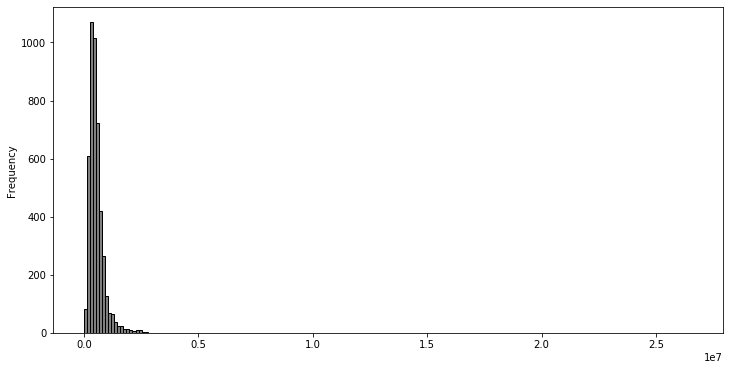

In [10]:
#looking at the price distribution of house
df['price'].plot(kind='hist', bins=200, figsize=(12,6), facecolor='grey',
                            edgecolor='black')

In [11]:
#For price maximum values lies between 0 to 0.5*10**7, few houses have price listed as zero
#finsing number of houses with zero prices
alpha = df[df.price == 0]
print(str(len(alpha)))

49


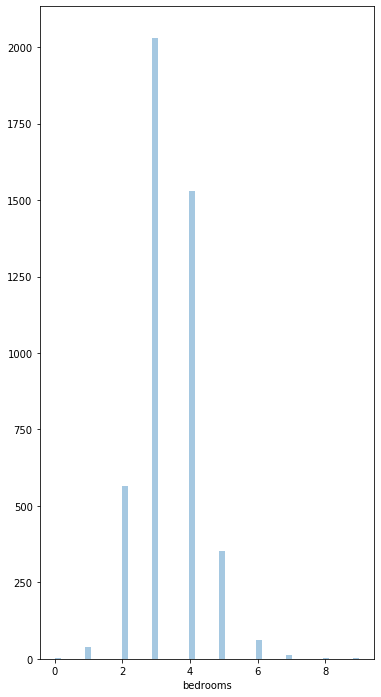

In [12]:
#getting ditribution of bedrooms (Nominal Data)
f, ax = plt.subplots(figsize=(6, 12))
sns.distplot(df['bedrooms'], kde = False)

In [13]:
#Finding the numbe of houses in each category
df.bedrooms.value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

In [14]:
#we have houses with number of bedrooms o and very few houses with bedrooms 8 and 9

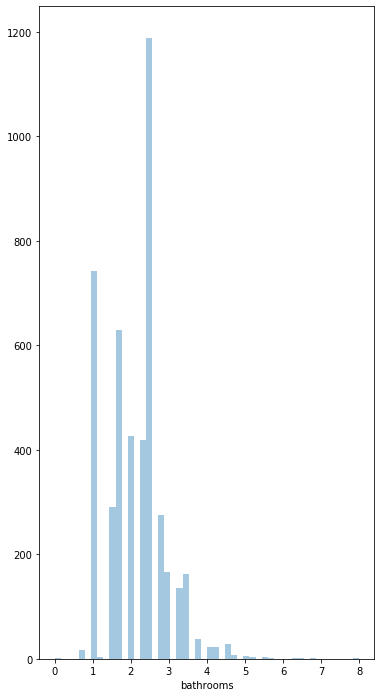

In [15]:
#Visualizing the bathrooma (nominal data)
f, ax = plt.subplots(figsize=(6, 12))
sns.distplot(df['bathrooms'], kde = False)

In [16]:
#getting count for each category
df.bathrooms.value_counts()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.00      23
4.25      23
0.75      17
4.75       7
5.00       6
5.50       4
5.25       4
1.25       3
6.25       2
0.00       2
8.00       1
6.50       1
5.75       1
6.75       1
Name: bathrooms, dtype: int64

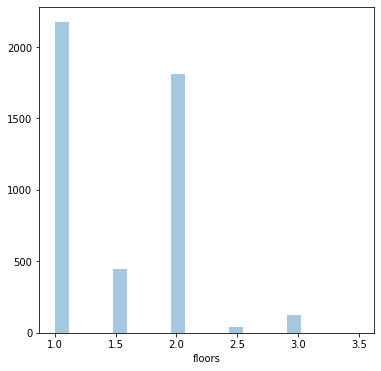

In [17]:
#Visualizing floors (nominal data)
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df['floors'], kde = False)

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

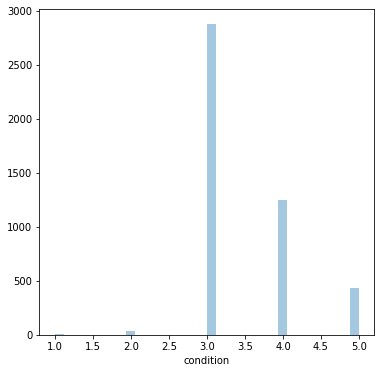

In [18]:
#Visualising condition (nominal data)
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df['condition'], kde = False)
df.condition.value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

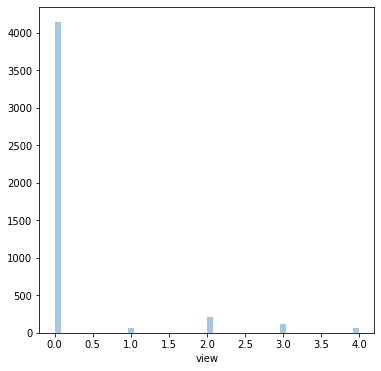

In [19]:
#Visualising view (nominal data)
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df['view'], kde = False)
df.view.value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

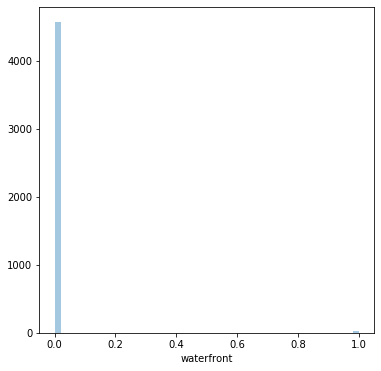

In [20]:
#Visualising waterfront (nominal data)
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df['waterfront'], kde = False)
df.waterfront.value_counts()

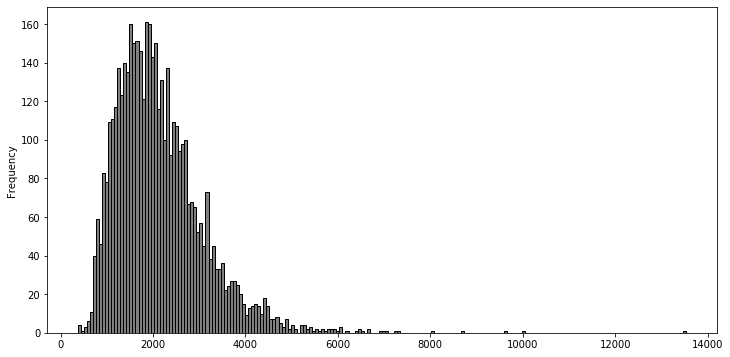

In [21]:
#looking at the sqft_living distribution of house
df['sqft_living'].plot(kind='hist', bins=200, figsize=(12,6), facecolor='grey',
                            edgecolor='black')

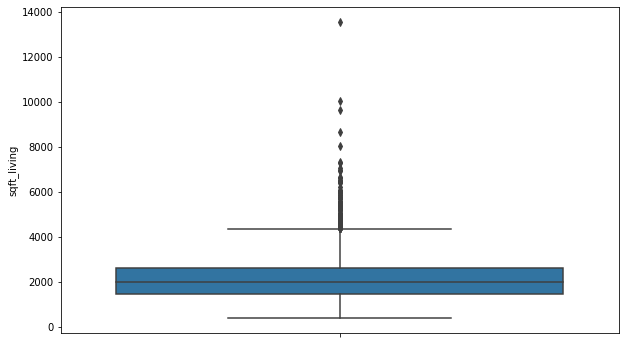

In [22]:
#Outliers are not clear, we will use a boxplot instead
plt.figure(figsize = (10,6))
sns.boxplot(y = df['sqft_living'])

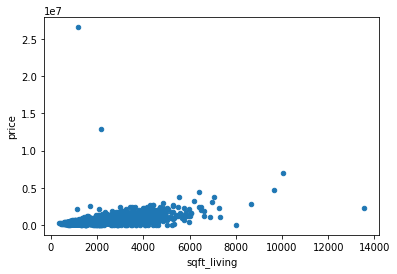

In [23]:
#There is no specific boundary for sqft_living there are numerous outliers
#visualising sqft living and price together (bivariate) for inference
df.plot(kind='scatter', x='sqft_living', y='price')

In [24]:
#What we can conclude from this about how to clean data??

In [25]:
#finding age of differnet houses
datem = datetime.now().year
df['age'] = datem - df['yr_built']

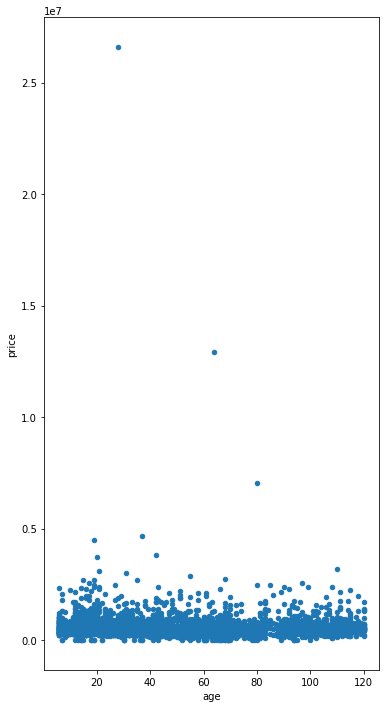

In [26]:
#There is no specific boundary for sqft_living there are numerous outliers
#visualising sqft living and price together (bivariate) for inference
df.plot(kind='scatter', x='age', y='price', figsize=(6,12))

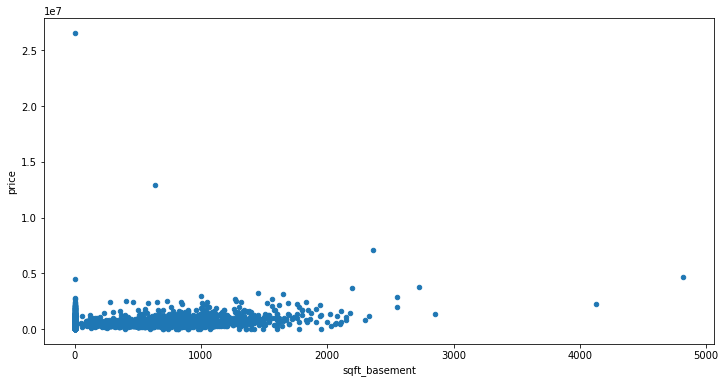

In [27]:
#There is no specific boundary for sqft_living there are numerous outliers
#visualising sqft living and price together (bivariate) for inference
df.plot(kind='scatter', x='sqft_basement', y='price', figsize=(12,6))

In [28]:
#making a new dataframe considering the outliesrs
house = df[(df['price']<1*10**7 )& (df['price']>0) & (df['bedrooms']>0) & (df['bedrooms']<8)]

In [29]:
house.shape
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,age
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,65
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,99
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,54
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,57
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,44


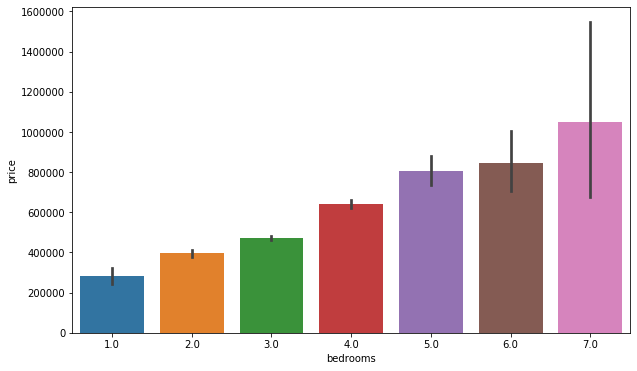

In [30]:
#plotting price distribution with respect to bedrooms
#using barplots
plt.figure(figsize = (10,6))
sns.barplot(x = house.bedrooms, y = house['price'])

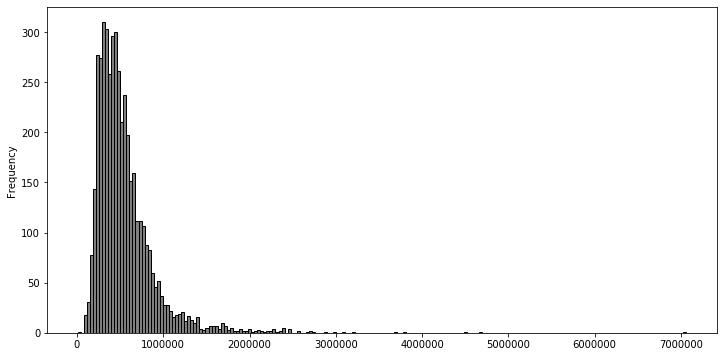

In [31]:
#looking at the price distribution of house
house['price'].plot(kind='hist', bins=200, figsize=(12,6), facecolor='grey',
                            edgecolor='black')

In [32]:
#we will convert year renovated into 0 and 1
house['renovated_or_not'] = house.apply(
    lambda row: 1 if (row['yr_renovated']>0) else row['yr_renovated'],
    axis=1
)
house['renovated_or_not'].fillna(0, inplace = False)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       1
1       0
2       0
3       0
4       1
       ..
4595    1
4596    1
4597    0
4598    0
4599    0
Name: renovated_or_not, Length: 4544, dtype: int64

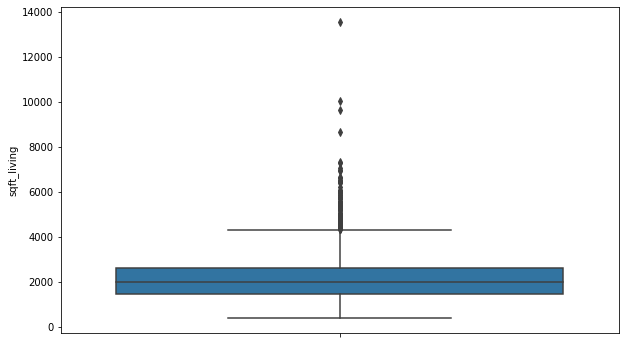

In [33]:
#Outliers are not clear, we will use a boxplot instead
plt.figure(figsize = (10,6))
sns.boxplot(y = house['sqft_living'])

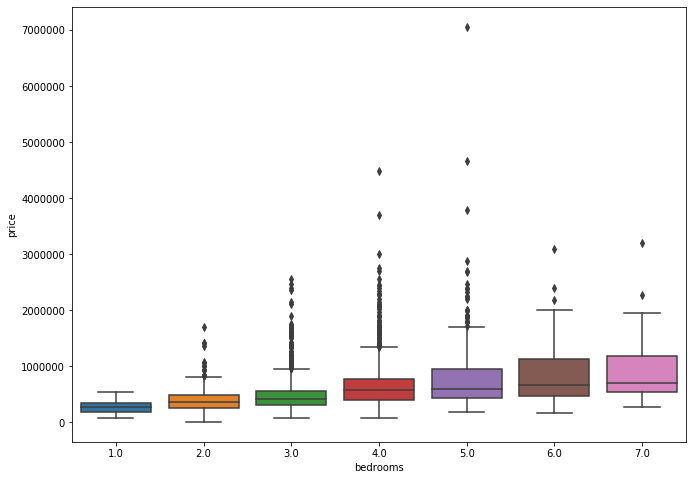

In [34]:
#a box plot to check for outliers
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'bedrooms', y= 'price', data = house)

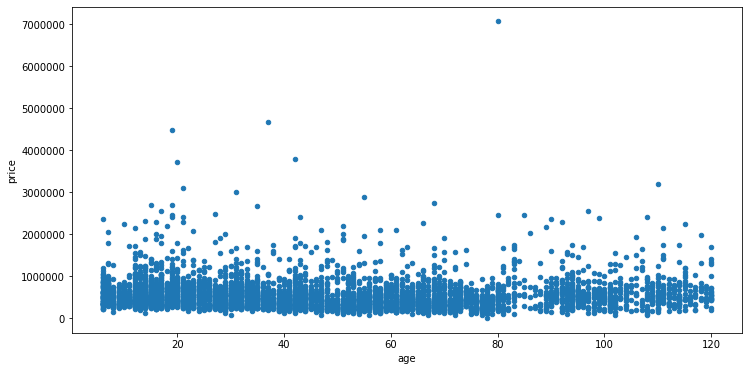

In [35]:
#There is no specific boundary for sqft_living there are numerous outliers
#visualising sqft living and price together (bivariate) for inference
house.plot(kind='scatter', x='age', y='price', figsize=(12,6))

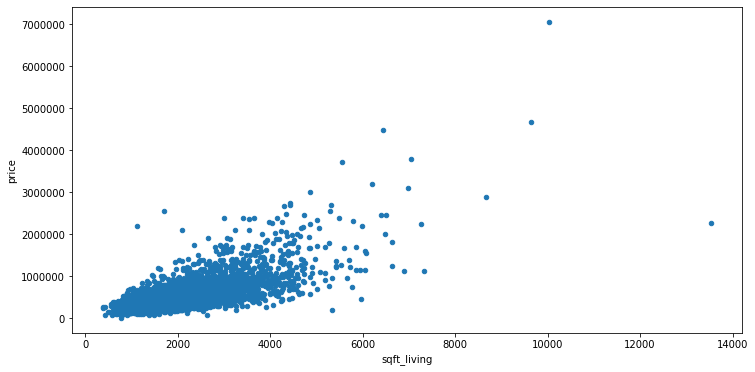

In [36]:
#There is no specific boundary for sqft_living there are numerous outliers
#visualising sqft living and price together (bivariate) for inference
house.plot(kind='scatter', x='sqft_living', y='price', figsize=(12,6))

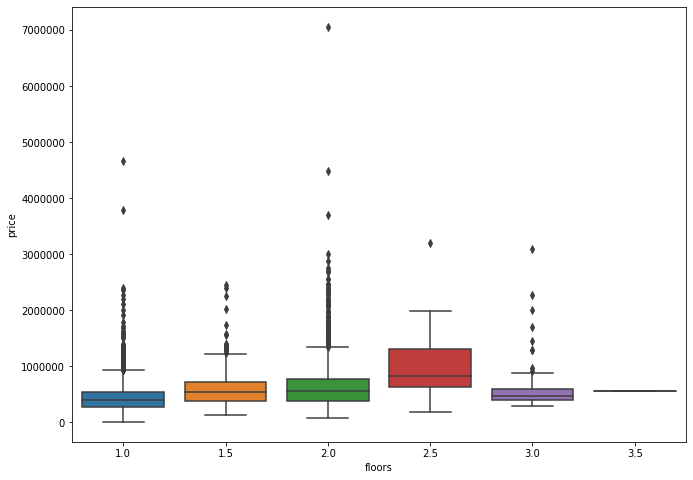

In [37]:
#a box plot for floors and price 
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'floors', y= 'price', data = house)

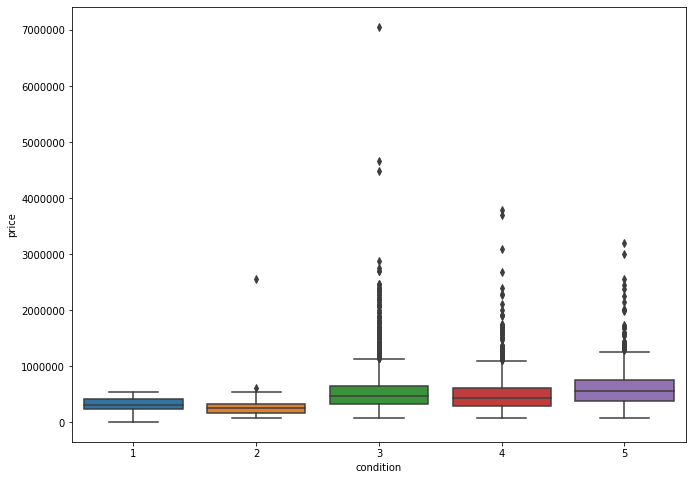

In [38]:
#a box plot for pice variation with condition
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'condition', y= 'price', data = house)

In [39]:
house = house.drop(['yr_built', 'yr_renovated', 'date'], axis = 1)

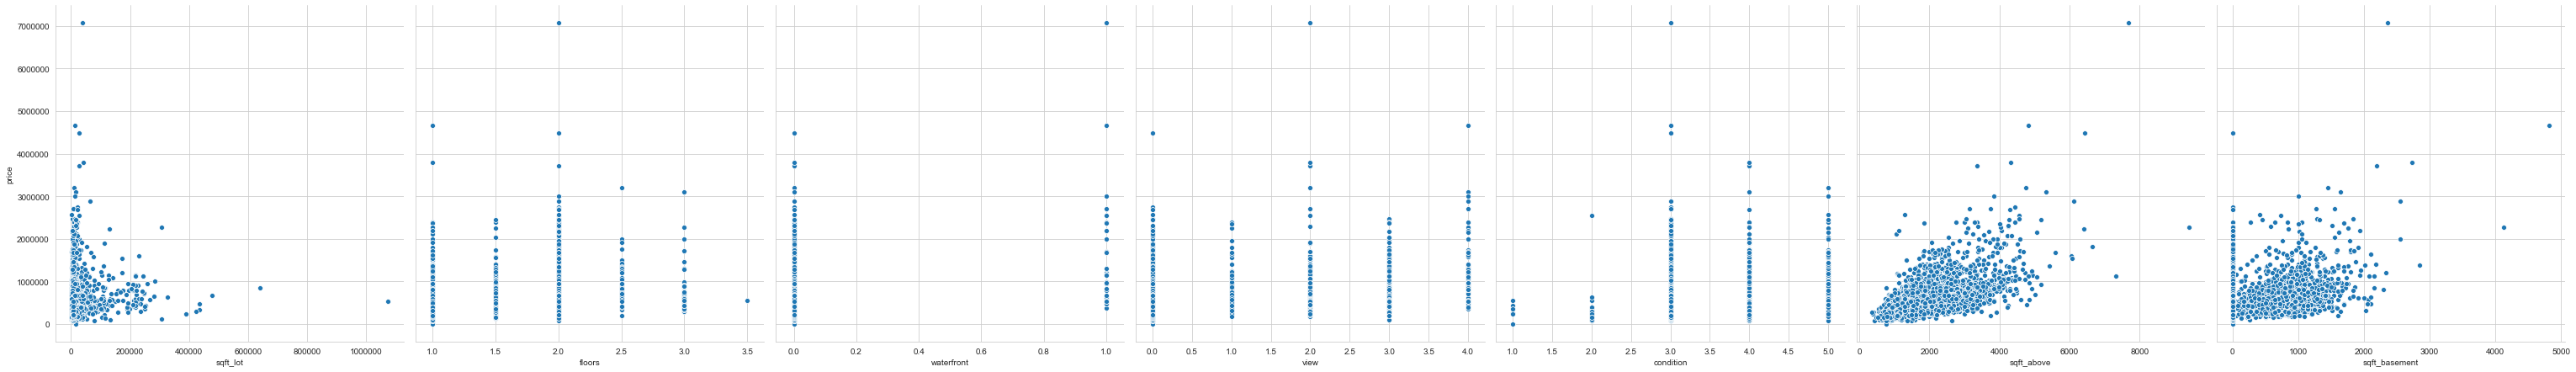

In [50]:
sns.set_style("whitegrid");
sns.pairplot(house, y_vars = ['price'],
             x_vars = ['sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement'], height = 6);

In [53]:
#In order to deal with the outliers I am transforming price to natural logorithm
house['log_price'] = np.log(house['price'])

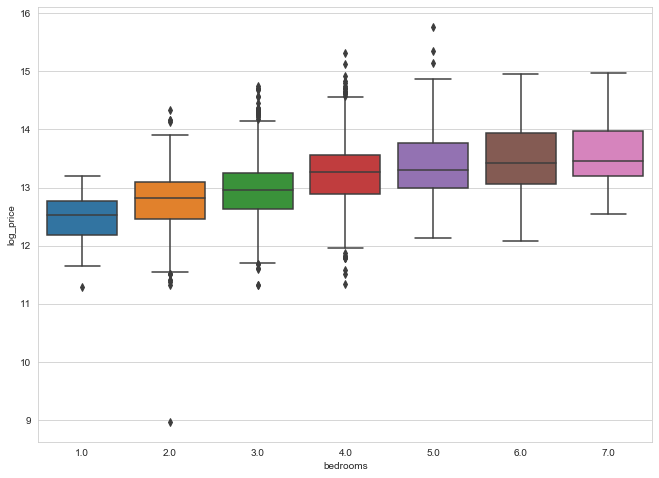

In [55]:
#a box plot to check for outliers
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'bedrooms', y= 'log_price', data = house)

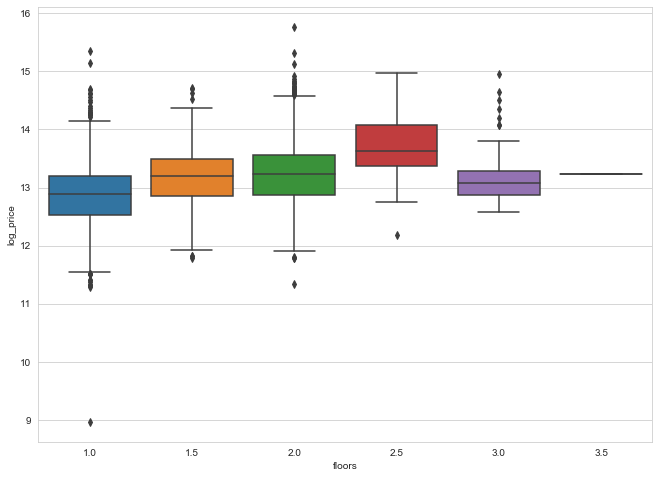

In [58]:
#a box plot to check for outliers
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'floors', y= 'log_price', data = house)

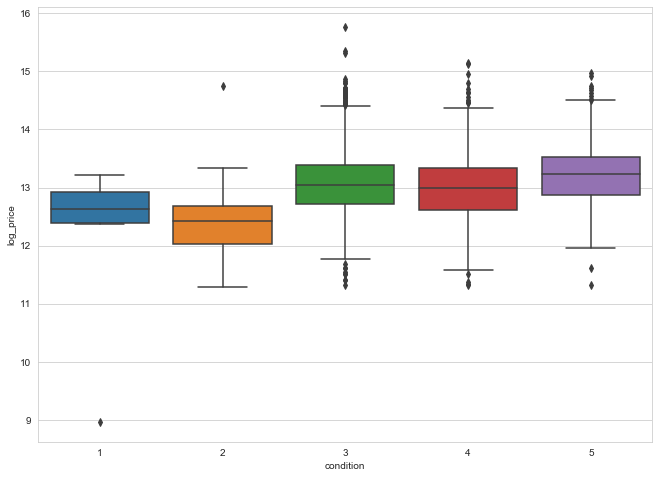

In [56]:
#a box plot for pice variation with condition
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'condition', y= 'log_price', data = house)

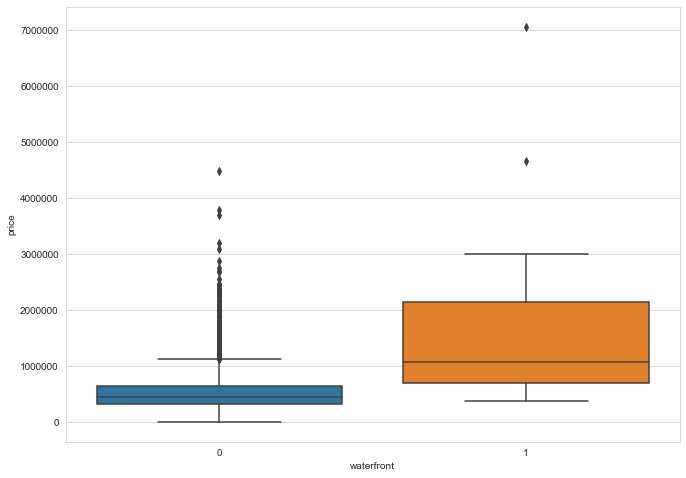

In [62]:
#a box plot for pice variation with condition
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'waterfront', y= 'price', data = house)

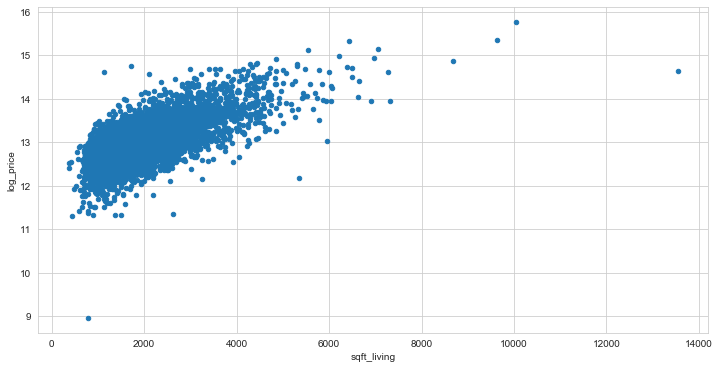

In [57]:
#There is no specific boundary for sqft_living there are numerous outliers
#visualising sqft living and price together (bivariate) for inference
house.plot(kind='scatter', x='sqft_living', y='log_price', figsize=(12,6))

In [ ]:
#Conclusion
#Type of Data: 1. Nominal Data: Bedrooms, Bathrooms, floors, view, condition, waterfront
              #2. If condition and view is rated in terms of liking and disliking then it is ordinal
              #3. All sqft_associated data, years and price is continuous
              #4. Age is nominal in our case
              #5. Renovated or not is nominal 
#From the graphs: 1. Sqft_living is directly proportional to price
                # 2. Price also increase generally with number of bedrooms
                # 3. View, waterfront and floors also affect the price
                # 4. Condition and age doesn't effect the price considerably
                # 5. Generally price decrease with sqft_lot and it varies in different manner with sqft_basement

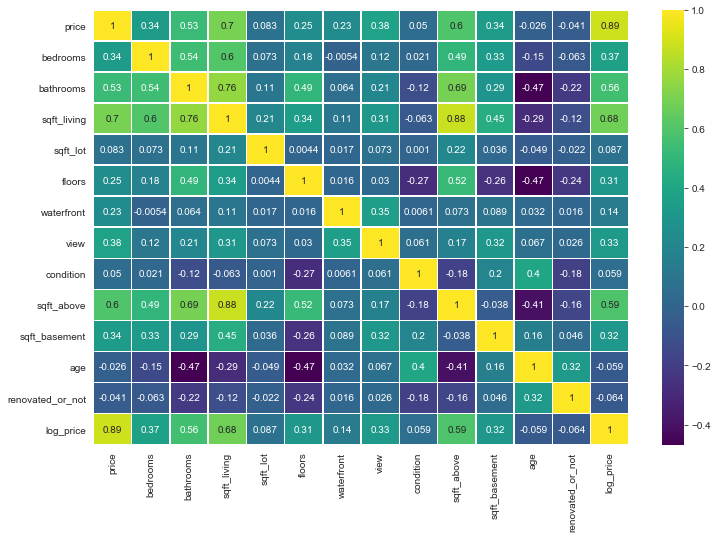

In [63]:
#plotting a heatmap to define correlation
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(house.corr(), annot = True, linewidths=.5, ax=ax, cmap = 'viridis')